In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_squared_error
from math import sqrt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
serie = pd.read_excel('/content/EXP_071A (1).xlsx')
pd.to_datetime(serie['Tempo'])
serie = serie.set_index('Tempo')

In [3]:

serie.head(10)

,Preco
Tempo,
1997-01-01,2163.329002
1997-02-01,2615.276649
1997-03-01,3154.285307
1997-04-01,3419.366819
1997-05-01,3481.416665
1997-06-01,3598.022804
1997-07-01,3430.140087
1997-08-01,3343.247380
1997-09-01,3273.841668


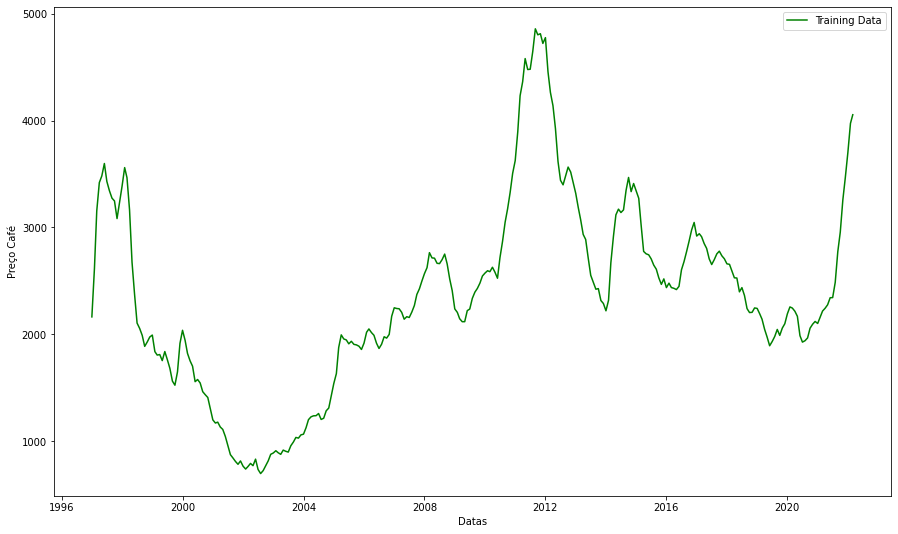

In [4]:
plt.figure(figsize=(15,9))
plt.grid = True
plt.xlabel('Datas')
plt.ylabel('Preço Café')
plt.plot(serie, 'green', label = 'Training Data')

plt.legend()

Text(0.5, 1.0, 'Preço do Café - US$ por Tonelada')

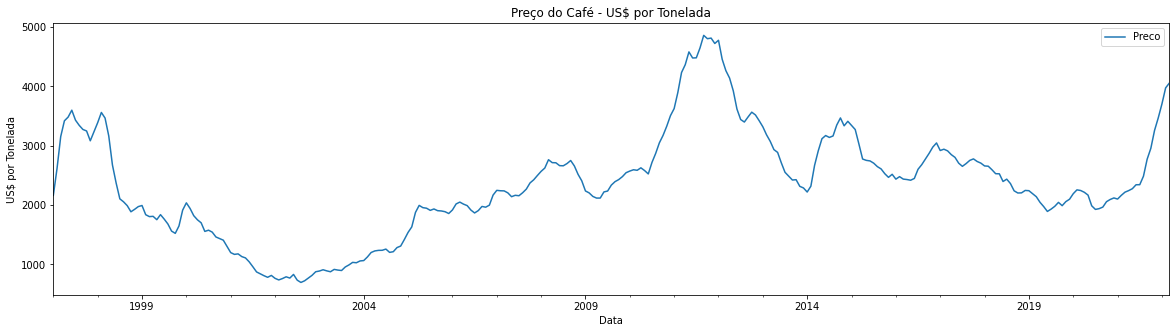

In [5]:
serie.plot(figsize=(20,5))
plt.xlabel('Data')
plt.ylabel('US$ por Tonelada')
plt.legend(loc='best')
plt.title('Preço do Café - US$ por Tonelada')

Text(0.5, 1.0, 'Média e Desvio Padrão')

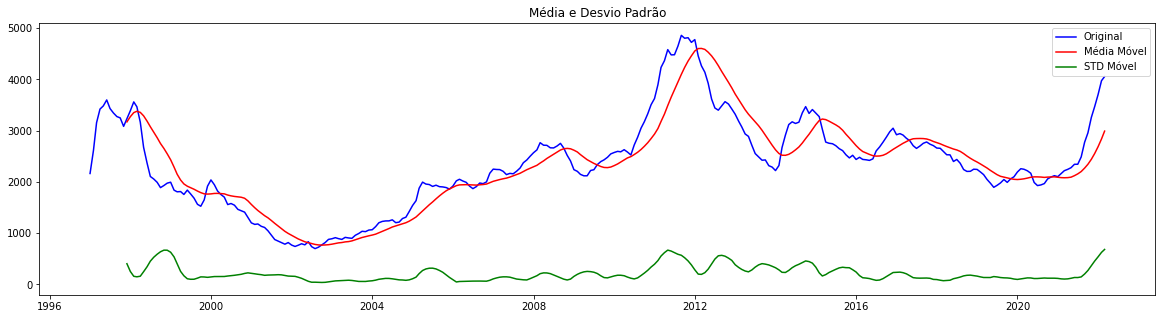

In [6]:
rolmean = serie.rolling(window=12).mean() 
rolstd = serie.rolling(window=12).std()
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(serie, color='blue', label='Original')
plt.plot(rolmean, color='red', label='Média Móvel')
plt.plot(rolstd, color='green', label='STD Móvel')
plt.legend(loc='best')
plt.title('Média e Desvio Padrão')

In [7]:
def test_stationarity_adf(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return orig, mean, std, dfoutput

In [8]:
ts = serie['Preco']




In [9]:
def test_stationarity_kpss(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform KPSS test:
    print('Results of KPSS Test:')
    kpsstest = kpss(timeseries)
    kpssoutput = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used', ])
    for key,value in kpsstest[3].items():
        kpssoutput['Critical Value (%s)'%key] = value
    return orig, mean, std, kpssoutput

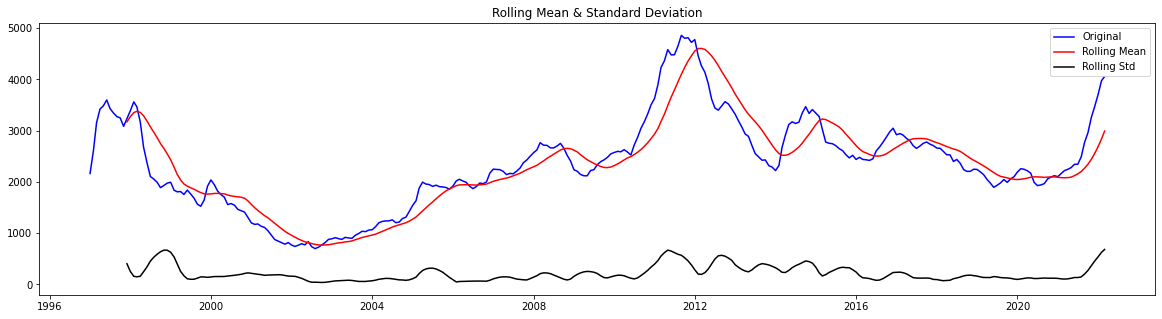

Results of KPSS Test:


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


([<matplotlib.lines.Line2D at 0x7fc0d1a37190>],
 Test Statistic            0.553172
 p-value                   0.029691
 #Lags Used               16.000000
 Critical Value (10%)      0.347000
 Critical Value (5%)       0.463000
 Critical Value (2.5%)     0.574000
 Critical Value (1%)       0.739000
 dtype: float64)

In [10]:
test_stationarity_kpss(ts)

In [11]:
ts_diff = ts.diff()
ts_diff = ts_diff.dropna()
test_size = 3

df_train = ts_diff[:-test_size]
df_test = ts_diff[-test_size:]


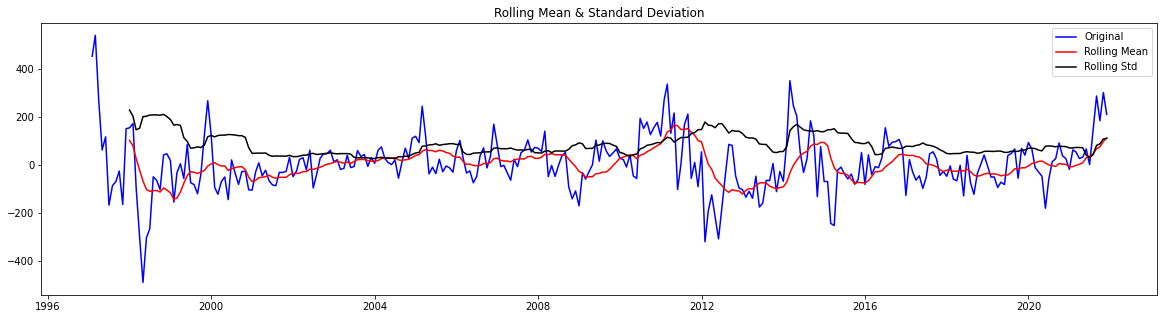

Results of Dickey Fuller Test:


([<matplotlib.lines.Line2D at 0x7fc0d01aa090>],
 Test Statistic                -8.581575e+00
 p-value                        7.702957e-14
 #Lags Used                     0.000000e+00
 Number of Observations Used    2.980000e+02
 Critical Value (1%)           -3.452486e+00
 Critical Value (5%)           -2.871288e+00
 Critical Value (10%)          -2.571964e+00
 dtype: float64)

In [12]:
test_stationarity_adf(df_train)

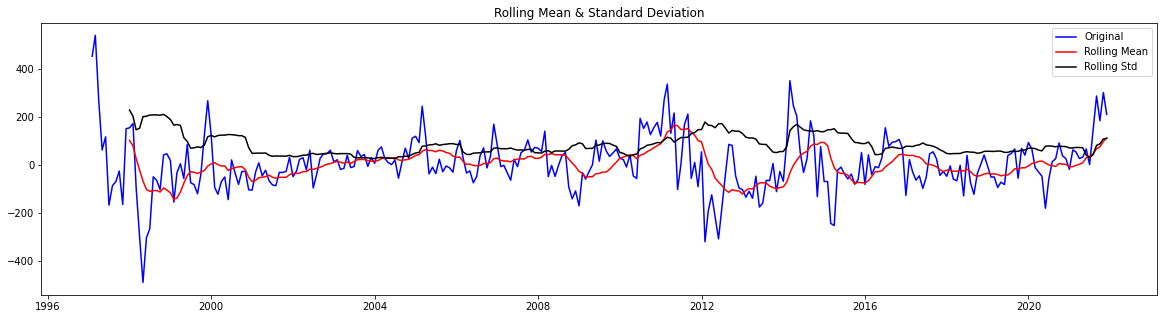

Results of KPSS Test:


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


([<matplotlib.lines.Line2D at 0x7fc0d0129d50>],
 Test Statistic            0.066855
 p-value                   0.100000
 #Lags Used               16.000000
 Critical Value (10%)      0.347000
 Critical Value (5%)       0.463000
 Critical Value (2.5%)     0.574000
 Critical Value (1%)       0.739000
 dtype: float64)

In [13]:
test_stationarity_kpss(df_train)

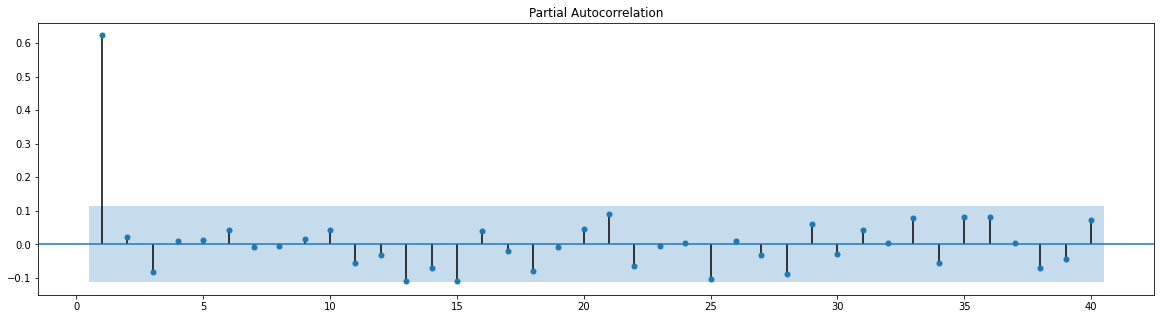

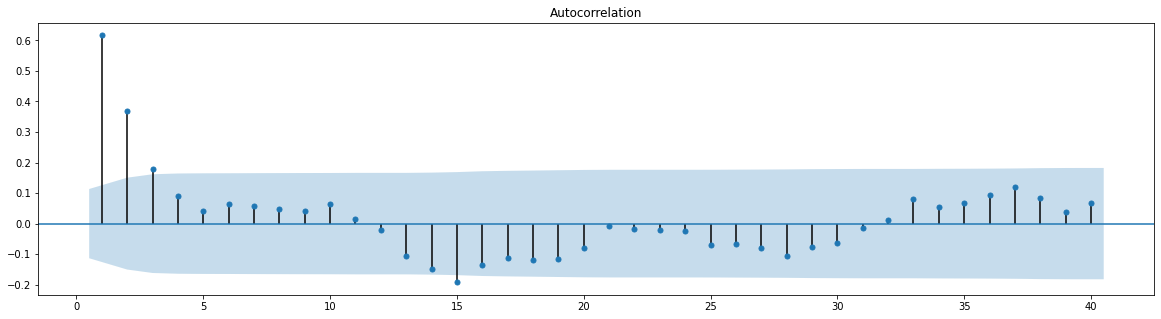

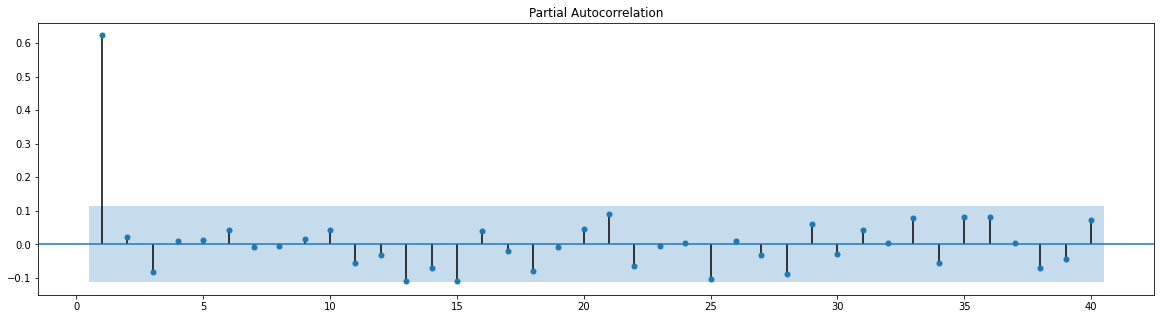

In [22]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df_train, lags=40, zero=False)
sgt.plot_pacf(df_train, lags=40, zero=False, method=('ols'))

In [35]:
model1 = ARIMA(df_train, order=(1,0,0))
results_ar = model1.fit(disp=-1)
results_ar.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Preco   No. Observations:                  299
Model:                     ARMA(1, 0)   Log Likelihood               -1767.175
Method:                       css-mle   S.D. of innovations             89.158
Date:                Tue, 03 May 2022   AIC                           3540.349
Time:                        10:27:16   BIC                           3551.450
Sample:                    02-01-1997   HQIC                          3544.792
                         - 12-01-2021                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.4352     14.827      0.569      0.570     -20.626      37.496
ar.L1.Preco     0.6539      0.046     14.262      0.000       0.564       0.744
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5293           +0.0000j            1.5293            0.0000
-----------------------------------------------------------------------------
"""

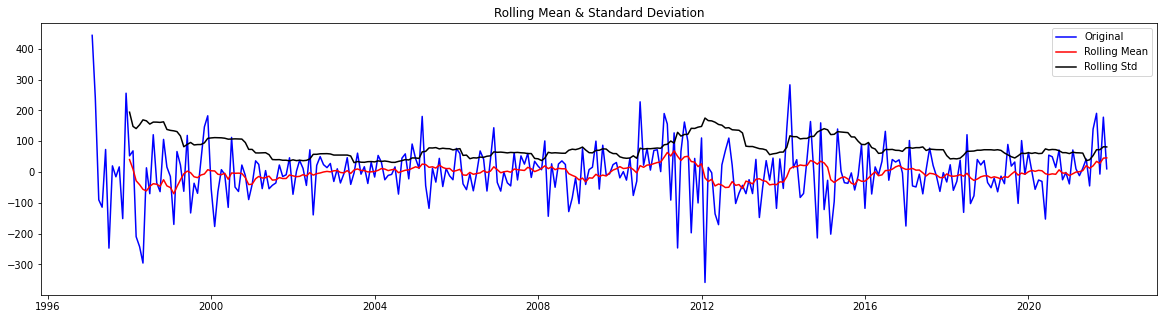

Results of Dickey Fuller Test:


([<matplotlib.lines.Line2D at 0x7fc0cb122690>],
 Test Statistic                -1.839589e+01
 p-value                        2.196639e-30
 #Lags Used                     0.000000e+00
 Number of Observations Used    2.980000e+02
 Critical Value (1%)           -3.452486e+00
 Critical Value (5%)           -2.871288e+00
 Critical Value (10%)          -2.571964e+00
 dtype: float64)

In [36]:
resid1 = results_ar.resid

test_stationarity_adf(resid1)

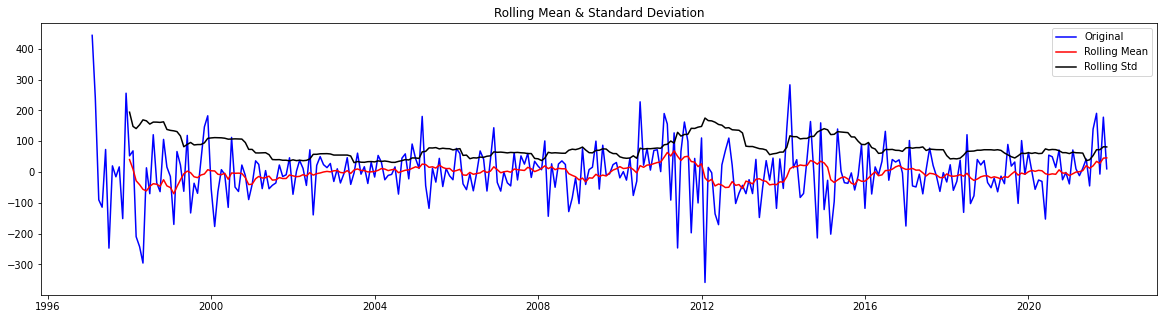

Results of KPSS Test:


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


([<matplotlib.lines.Line2D at 0x7fc0cb069050>],
 Test Statistic            0.071395
 p-value                   0.100000
 #Lags Used               16.000000
 Critical Value (10%)      0.347000
 Critical Value (5%)       0.463000
 Critical Value (2.5%)     0.574000
 Critical Value (1%)       0.739000
 dtype: float64)

In [37]:
test_stationarity_kpss(resid1)

In [56]:
# walk-forward validation
history = [x for x in df_train]
predictions = list()
for t in range(len(df_test)):
	model = ARIMA(history, order=(1,0,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = df_test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=140.306876, expected=235.303016
predicted=158.295322, expected=270.412285
predicted=183.585676, expected=80.975553


In [58]:
rmse = sqrt(mean_squared_error(df_test, predictions))
rmse

103.47836710352445

In [62]:
predictions = pd.DataFrame(predictions, index=df_test.index)
predictions

,0
Tempo,
2022-01-01,140.306876
2022-02-01,158.295322
2022-03-01,183.585676


Text(0.5, 1.0, 'Forecasting')

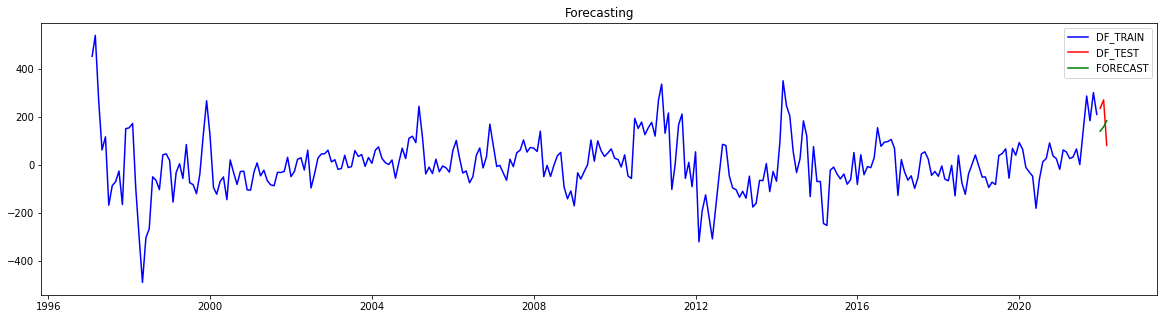

In [63]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(df_train, color='blue', label='DF_TRAIN')
plt.plot(df_test, color='red', label='DF_TEST')
plt.plot(predictions, color='green', label='FORECAST')
plt.legend(loc='best')
plt.title('Forecasting')

Text(0.5, 1.0, 'Forecasting')

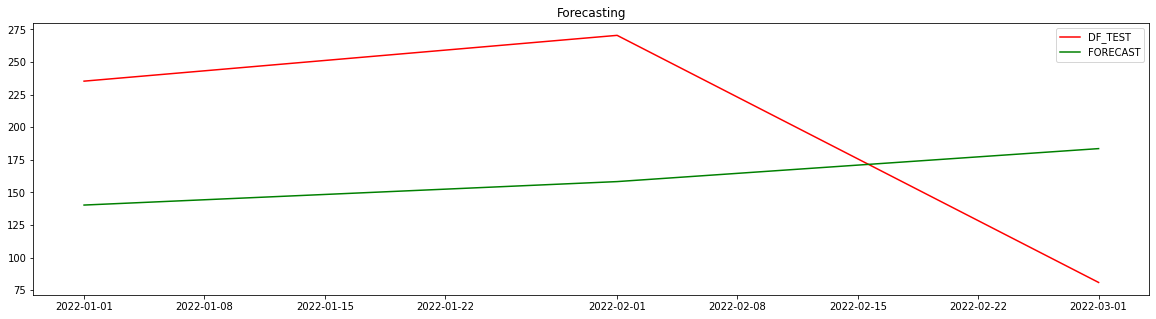

In [65]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(df_test, color='red', label='DF_TEST')
plt.plot(predictions, color='green', label='FORECAST')
plt.legend(loc='best')
plt.title('Forecasting')